# Creating and Backtesting SMA Strategies BTC USD


## Getting the Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
df = pd.read_csv("btcusd.csv", parse_dates = ["Date"], index_col = "Date")

In [3]:
df

,price
Date,
2013-04-29,144.539993
2013-04-30,139.000000
2013-05-01,116.989998
2013-05-02,105.209999
2013-05-03,97.750000
...,...
2021-07-02,33897.048590
2021-07-03,34668.548400
2021-07-04,35287.779770


In [145]:
df.describe()

,price,returns,creturns,cummax
count,2990.000000,2990.000000,2990.000000,2990.000000
mean,6713.486681,0.001829,46.447260,81.006895
std,11299.393126,0.042758,78.174856,101.582607
min,68.431000,-0.464730,0.473440,0.961672
25%,430.918991,-0.013092,2.981313,7.964370
50%,2295.694946,0.001881,15.882766,17.309743
75%,8577.107249,0.018497,59.340720,134.892772
max,63503.457930,0.357451,439.348698,439.348698


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2991 entries, 2013-04-29 to 2021-07-06
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2991 non-null   float64
dtypes: float64(1)
memory usage: 46.7 KB


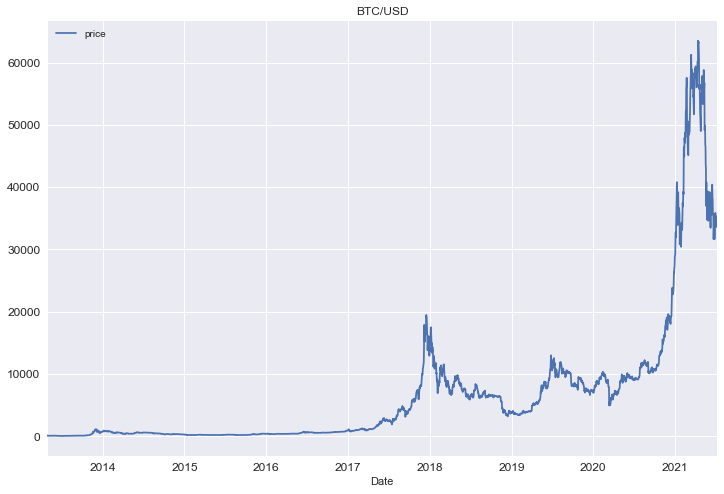

In [5]:
df.plot(figsize = (12, 8), title = "BTC/USD", fontsize = 12)
plt.show()

In [6]:
df["returns"] = np.log(df.div(df.shift(1)))

In [7]:
df

,price,returns
Date,,
2013-04-29,144.539993,NaN
2013-04-30,139.000000,-0.039082
2013-05-01,116.989998,-0.172385
2013-05-02,105.209999,-0.106130
2013-05-03,97.750000,-0.073545
...,...,...
2021-07-02,33897.048590,0.009632
2021-07-03,34668.548400,0.022505
2021-07-04,35287.779770,0.017704


## A simple Buy and Hold "Strategy"

In [8]:
df.dropna(inplace = True)

In [9]:
df

,price,returns
Date,,
2013-04-30,139.000000,-0.039082
2013-05-01,116.989998,-0.172385
2013-05-02,105.209999,-0.106130
2013-05-03,97.750000,-0.073545
2013-05-04,112.500000,0.140540
...,...,...
2021-07-02,33897.048590,0.009632
2021-07-03,34668.548400,0.022505
2021-07-04,35287.779770,0.017704


In [61]:
dailyreturns = df["returns"]
dailyreturns

Date
2013-04-30   -0.039082
2013-05-01   -0.172385
2013-05-02   -0.106130
2013-05-03   -0.073545
2013-05-04    0.140540
                ...   
2021-07-02    0.009632
2021-07-03    0.022505
2021-07-04    0.017704
2021-07-05   -0.044675
2021-07-06    0.014392
Name: returns, Length: 2990, dtype: float64

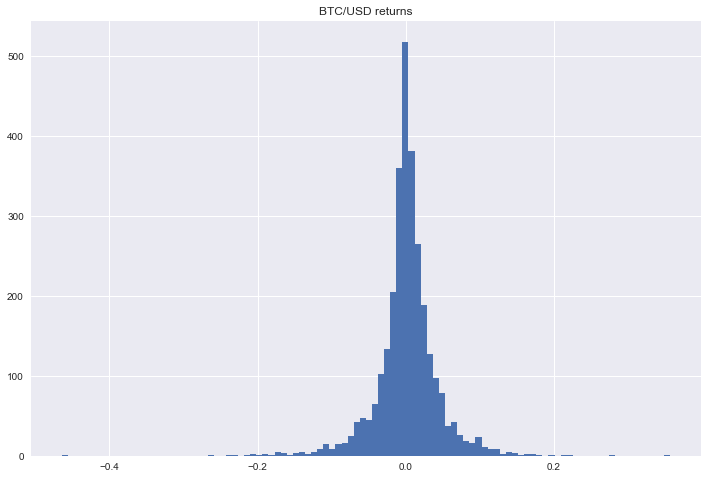

In [10]:
df.returns.hist(bins = 100, figsize = (12, 8))
plt.title("BTC/USD returns")
plt.show()

In [11]:
df.returns.sum()

5.467453202688237

In [146]:
np.exp(df.returns.sum())

236.85619923160792

In [13]:
df.price[-1] / df.price[0]

246.29635575539567

In [14]:
df.returns.cumsum().apply(np.exp)

Date
2013-04-30      0.961672
2013-05-01      0.809395
2013-05-02      0.727895
2013-05-03      0.676283
2013-05-04      0.778331
                 ...    
2021-07-02    234.516744
2021-07-03    239.854366
2021-07-04    244.138518
2021-07-05    233.471731
2021-07-06    236.856199
Name: returns, Length: 2990, dtype: float64

In [15]:
df["creturns"] = df.returns.cumsum().apply(np.exp)

In [16]:
df

,price,returns,creturns
Date,,,
2013-04-30,139.000000,-0.039082,0.961672
2013-05-01,116.989998,-0.172385,0.809395
2013-05-02,105.209999,-0.106130,0.727895
2013-05-03,97.750000,-0.073545,0.676283
2013-05-04,112.500000,0.140540,0.778331
...,...,...,...
2021-07-02,33897.048590,0.009632,234.516744
2021-07-03,34668.548400,0.022505,239.854366
2021-07-04,35287.779770,0.017704,244.138518


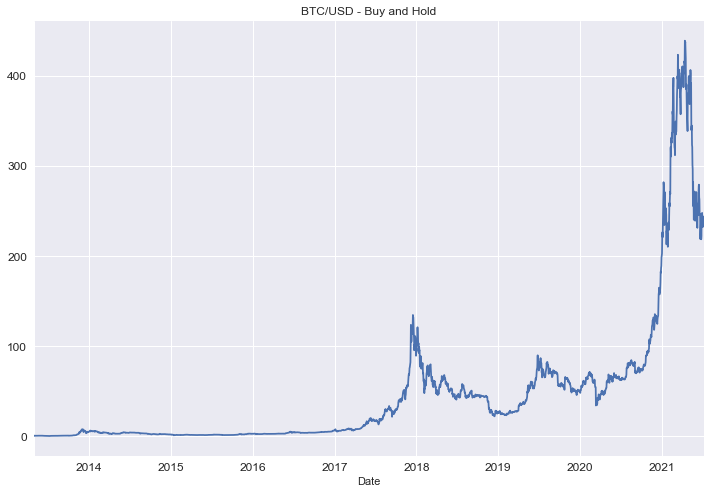

In [17]:
df.creturns.plot(figsize = (12, 8), title = "BTC/USD - Buy and Hold", fontsize = 12)
plt.show()

## More Performance Metrics

In [18]:
df

,price,returns,creturns
Date,,,
2013-04-30,139.000000,-0.039082,0.961672
2013-05-01,116.989998,-0.172385,0.809395
2013-05-02,105.209999,-0.106130,0.727895
2013-05-03,97.750000,-0.073545,0.676283
2013-05-04,112.500000,0.140540,0.778331
...,...,...,...
2021-07-02,33897.048590,0.009632,234.516744
2021-07-03,34668.548400,0.022505,239.854366
2021-07-04,35287.779770,0.017704,244.138518


In [19]:
df.creturns.iloc[-1] # absolute Performance 

236.85619923160792

In [20]:
df.returns.sum() # absolute Performance

5.467453202688237

In [21]:
df.describe()

,price,returns,creturns
count,2990.000000,2990.000000,2990.000000
mean,6713.486681,0.001829,46.447260
std,11299.393126,0.042758,78.174856
min,68.431000,-0.464730,0.473440
25%,430.918991,-0.013092,2.981313
50%,2295.694946,0.001881,15.882766
75%,8577.107249,0.018497,59.340720
max,63503.457930,0.357451,439.348698


__annualized mean return and risk__

In [147]:
df.returns.mean() * 365 # mean return

0.6674315782545841

In [148]:
df.returns.std() * np.sqrt(365) # risk

0.8168955585152967

__maximum drawdown__

In [24]:
df

,price,returns,creturns
Date,,,
2013-04-30,139.000000,-0.039082,0.961672
2013-05-01,116.989998,-0.172385,0.809395
2013-05-02,105.209999,-0.106130,0.727895
2013-05-03,97.750000,-0.073545,0.676283
2013-05-04,112.500000,0.140540,0.778331
...,...,...,...
2021-07-02,33897.048590,0.009632,234.516744
2021-07-03,34668.548400,0.022505,239.854366
2021-07-04,35287.779770,0.017704,244.138518


In [25]:
df["cummax"] = df.creturns.cummax()

In [26]:
df

,price,returns,creturns,cummax
Date,,,,
2013-04-30,139.000000,-0.039082,0.961672,0.961672
2013-05-01,116.989998,-0.172385,0.809395,0.961672
2013-05-02,105.209999,-0.106130,0.727895,0.961672
2013-05-03,97.750000,-0.073545,0.676283,0.961672
2013-05-04,112.500000,0.140540,0.778331,0.961672
...,...,...,...,...
2021-07-02,33897.048590,0.009632,234.516744,439.348698
2021-07-03,34668.548400,0.022505,239.854366,439.348698
2021-07-04,35287.779770,0.017704,244.138518,439.348698


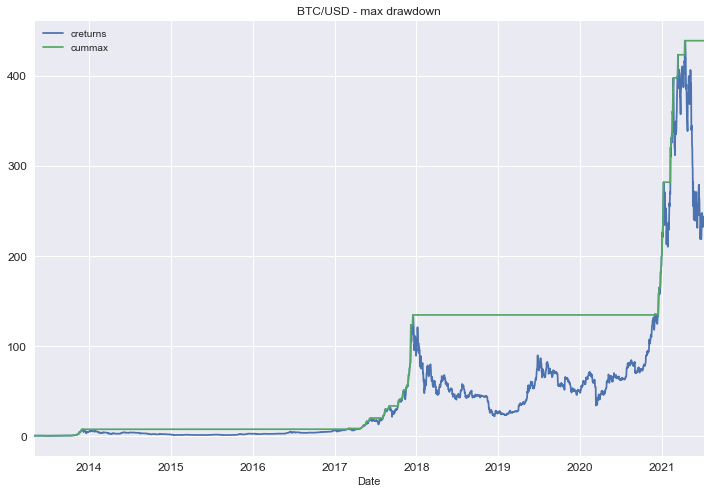

In [27]:
df[["creturns", "cummax"]].dropna().plot(figsize = (12, 8), title = "BTC/USD - max drawdown", fontsize = 12)
plt.show()

In [28]:
drawdown = df["cummax"] - df["creturns"]
drawdown

Date
2013-04-30      0.000000
2013-05-01      0.152276
2013-05-02      0.233776
2013-05-03      0.285388
2013-05-04      0.183340
                 ...    
2021-07-02    204.831955
2021-07-03    199.494333
2021-07-04    195.210180
2021-07-05    205.876967
2021-07-06    202.492499
Length: 2990, dtype: float64

In [29]:
drawdown.max() # maximum drawdown

220.46270476753958

In [30]:
drawdown.idxmax()

Timestamp('2021-06-25 00:00:00')

## Defining an SMA Crossover Strategy

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [32]:
data = pd.read_csv("btcusd.csv", parse_dates = ["Date"], index_col = "Date")

In [33]:
data

,price
Date,
2013-04-29,144.539993
2013-04-30,139.000000
2013-05-01,116.989998
2013-05-02,105.209999
2013-05-03,97.750000
...,...
2021-07-02,33897.048590
2021-07-03,34668.548400
2021-07-04,35287.779770


In [34]:
sma_s = 50
sma_l = 200

In [35]:
data.price.rolling(50).mean()

Date
2013-04-29             NaN
2013-04-30             NaN
2013-05-01             NaN
2013-05-02             NaN
2013-05-03             NaN
                  ...     
2021-07-02    37158.572250
2021-07-03    36854.332550
2021-07-04    36624.884414
2021-07-05    36370.683294
2021-07-06    36184.636935
Name: price, Length: 2991, dtype: float64

In [36]:
data["SMA_S"] = data.price.rolling(sma_s).mean()

In [37]:
data["SMA_L"] = data.price.rolling(sma_l).mean()

In [38]:
data

,price,SMA_S,SMA_L
Date,,,
2013-04-29,144.539993,NaN,NaN
2013-04-30,139.000000,NaN,NaN
2013-05-01,116.989998,NaN,NaN
2013-05-02,105.209999,NaN,NaN
2013-05-03,97.750000,NaN,NaN
...,...,...,...
2021-07-02,33897.048590,37158.572250,43975.762163
2021-07-03,34668.548400,36854.332550,44052.019525
2021-07-04,35287.779770,36624.884414,44121.905433


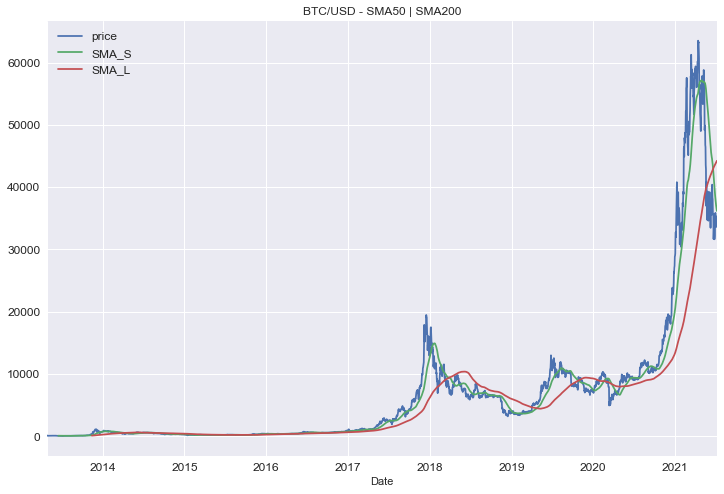

In [39]:
data.plot(figsize = (12, 8), title = "BTC/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [40]:
data.dropna(inplace = True)

In [41]:
data

,price,SMA_S,SMA_L
Date,,,
2013-11-14,420.200012,195.396600,132.887528
2013-11-15,417.950012,201.188000,134.254578
2013-11-16,440.220001,207.316800,135.760678
2013-11-17,492.109985,214.463400,137.636278
2013-11-18,703.559998,225.787800,140.628028
...,...,...,...
2021-07-02,33897.048590,37158.572250,43975.762163
2021-07-03,34668.548400,36854.332550,44052.019525
2021-07-04,35287.779770,36624.884414,44121.905433


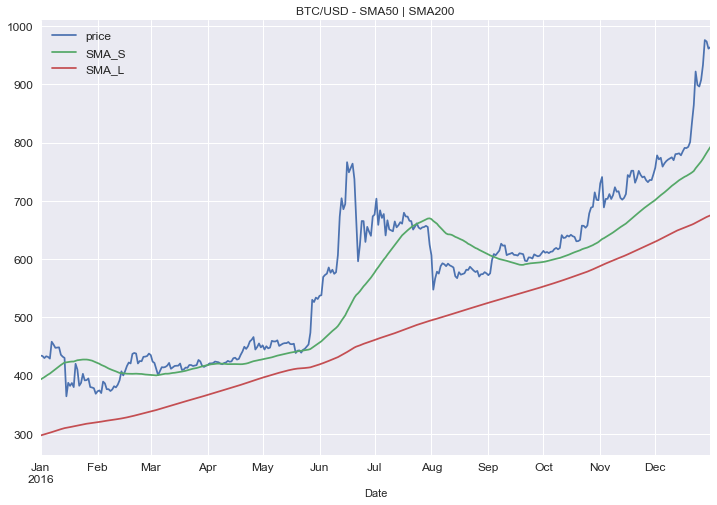

In [42]:
data.loc["2016"].plot(figsize = (12, 8), title = "BTC/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [43]:
data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1 )

In [44]:
data

,price,SMA_S,SMA_L,position
Date,,,,
2013-11-14,420.200012,195.396600,132.887528,1
2013-11-15,417.950012,201.188000,134.254578,1
2013-11-16,440.220001,207.316800,135.760678,1
2013-11-17,492.109985,214.463400,137.636278,1
2013-11-18,703.559998,225.787800,140.628028,1
...,...,...,...,...
2021-07-02,33897.048590,37158.572250,43975.762163,-1
2021-07-03,34668.548400,36854.332550,44052.019525,-1
2021-07-04,35287.779770,36624.884414,44121.905433,-1


In [150]:
data.loc[:, ["SMA_S", "SMA_L", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position",
                                                title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l))
plt.show()

IndexingError: Too many indexers

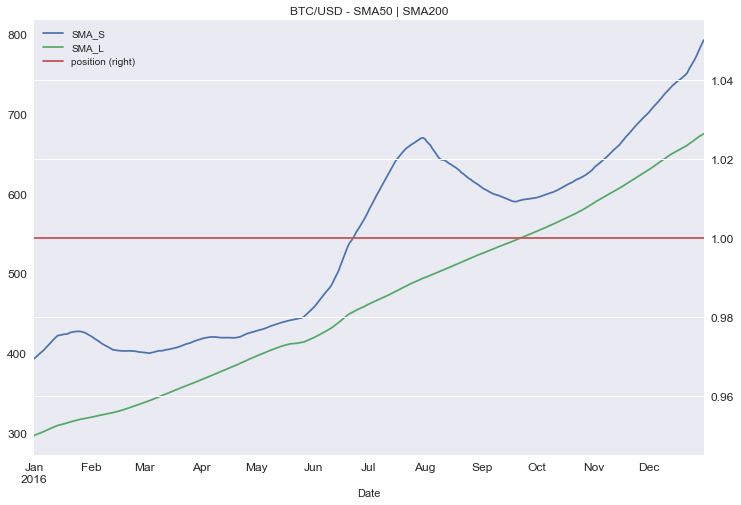

In [46]:
data.loc["2016", ["SMA_S", "SMA_L", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position",
                                                     title = "BTC/USD - SMA{} | SMA{}".format(sma_s, sma_l))
plt.show()

## Vectorized Strategy Backtesting

In [151]:
data

Date
2013-04-30   -0.039082
2013-05-01   -0.172385
2013-05-02   -0.106130
2013-05-03   -0.073545
2013-05-04    0.140540
                ...   
2021-07-02    0.009632
2021-07-03    0.022505
2021-07-04    0.017704
2021-07-05   -0.044675
2021-07-06    0.014392
Name: returns, Length: 2990, dtype: float64

In [152]:
data["returns"] = np.log(data.price.div(data.price.shift(1)))

AttributeError: 'Series' object has no attribute 'price'

In [49]:
data["strategy"] = data.position.shift(1) * data["returns"]

In [50]:
data

,price,SMA_S,SMA_L,position,returns,strategy
Date,,,,,,
2013-11-14,420.200012,195.396600,132.887528,1,NaN,NaN
2013-11-15,417.950012,201.188000,134.254578,1,-0.005369,-0.005369
2013-11-16,440.220001,207.316800,135.760678,1,0.051913,0.051913
2013-11-17,492.109985,214.463400,137.636278,1,0.111428,0.111428
2013-11-18,703.559998,225.787800,140.628028,1,0.357451,0.357451
...,...,...,...,...,...,...
2021-07-02,33897.048590,37158.572250,43975.762163,-1,0.009632,-0.009632
2021-07-03,34668.548400,36854.332550,44052.019525,-1,0.022505,-0.022505
2021-07-04,35287.779770,36624.884414,44121.905433,-1,0.017704,-0.017704


In [51]:
data.dropna(inplace = True)

In [62]:
smareturns = data["strategy"]
smareturns

Date
2013-11-15   -0.005369
2013-11-16    0.051913
2013-11-17    0.111428
2013-11-18    0.357451
2013-11-19   -0.185208
                ...   
2021-07-02   -0.009632
2021-07-03   -0.022505
2021-07-04   -0.017704
2021-07-05    0.044675
2021-07-06   -0.014392
Name: strategy, Length: 2791, dtype: float64

In [52]:
data[["returns", "strategy"]].sum() # absolute performance

returns     4.400279
strategy    4.081438
dtype: float64

In [53]:
data[["returns", "strategy"]].sum().apply(np.exp) # absolute performance

returns     81.473566
strategy    59.230564
dtype: float64

In [153]:
data[["returns", "strategy"]].mean() * 365 # annualized return

KeyError: "None of [Index(['returns', 'strategy'], dtype='object', name='Date')] are in the [index]"

In [55]:
data[["returns", "strategy"]].std() * np.sqrt(252) # annualized risk

returns     0.674280
strategy    0.674344
dtype: float64

In [56]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

In [57]:
data

,price,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy
Date,,,,,,,,
2013-11-15,417.950012,201.188000,134.254578,1,-0.005369,-0.005369,0.994645,0.994645
2013-11-16,440.220001,207.316800,135.760678,1,0.051913,0.051913,1.047644,1.047644
2013-11-17,492.109985,214.463400,137.636278,1,0.111428,0.111428,1.171133,1.171133
2013-11-18,703.559998,225.787800,140.628028,1,0.357451,0.357451,1.674345,1.674345
2013-11-19,584.609985,234.819999,143.062328,1,-0.185208,-0.185208,1.391266,1.391266
...,...,...,...,...,...,...,...,...
2021-07-02,33897.048590,37158.572250,43975.762163,-1,0.009632,-0.009632,80.668842,59.821427
2021-07-03,34668.548400,36854.332550,44052.019525,-1,0.022505,-0.022505,82.504872,58.490185
2021-07-04,35287.779770,36624.884414,44121.905433,-1,0.017704,-0.017704,83.978531,57.463797


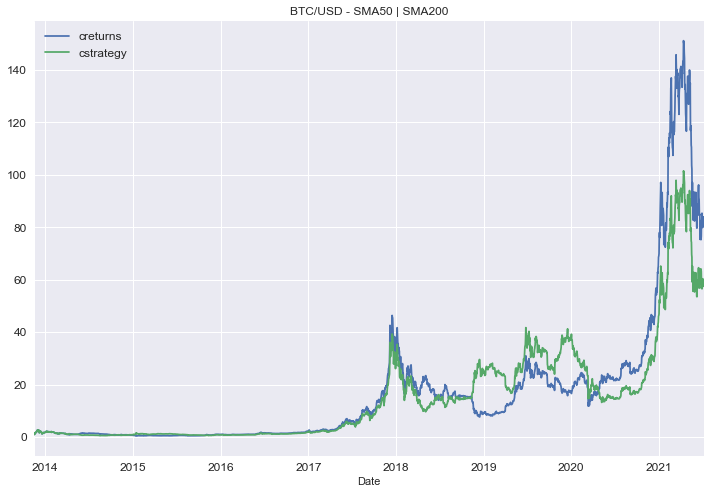

In [58]:
data[["creturns", "cstrategy"]].plot(figsize = (12, 8), title = "BTC/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [59]:
outperf = data.cstrategy.iloc[-1] - data.creturns.iloc[-1]
outperf

-22.243002151530035

In [80]:
dailyreturns

Date
2013-04-30   -0.039082
2013-05-01   -0.172385
2013-05-02   -0.106130
2013-05-03   -0.073545
2013-05-04    0.140540
                ...   
2021-07-02    0.009632
2021-07-03    0.022505
2021-07-04    0.017704
2021-07-05   -0.044675
2021-07-06    0.014392
Name: returns, Length: 2990, dtype: float64

In [83]:
smareturns

Date
2013-11-15   -0.005369
2013-11-16    0.051913
2013-11-17    0.111428
2013-11-18    0.357451
2013-11-19   -0.185208
                ...   
2021-07-02   -0.009632
2021-07-03   -0.022505
2021-07-04   -0.017704
2021-07-05    0.044675
2021-07-06   -0.014392
Name: strategy, Length: 2791, dtype: float64

In [97]:
#RESULTTEST


def estimate_python(data, k=5):
    "A slow pure python implementation"
    prices = data['price'].to_numpy(dtype=np.float64)
    log_prices = np.log(prices)
    rets = np.diff(log_prices)
    T = len(rets)
    mu = np.mean(rets)
    var_1 = np.var(rets, ddof=1, dtype=np.float64)
    rets_k = (log_prices - np.roll(log_prices, k))[k:]
    m = k * (T - k + 1) * (1 - k / T)
    var_k = 1/m * np.sum(np.square(rets_k - k * mu))

    # Variance Ratio
    vr = var_k / var_1
    # Phi1
    phi1 = 2 * (2*k - 1) * (k-1) / (3*k*T)
    # Phi2

    def delta(j):
        res = 0
        for t in range(j+1, T+1):
            t -= 1  # array index is t-1 for t-th element
            res += np.square((rets[t]-mu)*(rets[t-j]-mu))
        return res / ((T-1) * var_1)**2

    phi2 = 0
    for j in range(1, k):
        phi2 += (2*(k-j)/k)**2 * delta(j)

    return vr, (vr - 1) / np.sqrt(phi1), (vr - 1) / np.sqrt(phi2)


estimate_python(df, 5)


(0.9732499774347205, -0.6675233954934355, -0.39004647097215955)

In [94]:
prices = dailyreturns.to_numpy(dtype=np.float64)
prices

array([-0.03908231, -0.17238549, -0.1061301 , ...,  0.01770383,
       -0.04467476,  0.0143922 ])

In [108]:
import numpy as np

def variance_ratio(ts, lag = 2):
    """
    Returns the variance ratio test result
    """
    # make sure we are working with an array, convert if necessary
    ts = np.asarray(ts)
    
    # Apply the formula to calculate the test
    n = len(ts)
    mu  = sum(ts[1:n]-ts[:n-1])/n;
    m=(n-lag+1)*(1-lag/n);
    b=sum(np.square(ts[1:n]-ts[:n-1]-mu))/(n-1)
    t=sum(np.square(ts[lag:n]-ts[:n-lag]-lag*mu))/m
    
    return m,b,t
    

In [109]:
variance_ratio(dailyreturns, 2)

(2987.000668896321, 0.0037320304099451446, 0.0036274717652627314)

In [114]:
variance_ratio(smareturns, 2)

(2788.000716589036, 0.003732139090970131, 0.003651038647513141)

In [115]:
#RUNS TEST SMA

from statsmodels.sandbox.stats.runs import runstest_1samp 

#create dataset
data = smareturns
#Perform Runs test
runstest_1samp(data, correction=False)

(2.1076182904079643, 0.03506402018632693)

In [116]:
#RUNS TEST DAILY

from statsmodels.sandbox.stats.runs import runstest_1samp 

#create dataset
data = dailyreturns
#Perform Runs test
runstest_1samp(data, correction=False)

(2.4879831360100755, 0.01284698247120959)

In [120]:
#LI JUNGBOX SMA

import statsmodels.api as sm

res = sm.tsa.ARMA(smareturns, (1,1)).fit(disp=-1)
sm.stats.acorr_ljungbox(res.resid, lags=[3], return_df=True)

C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred

,lb_stat,lb_pvalue
3,0.093714,0.992581


In [2]:
#LI JUNGBOX DAILY

import statsmodels.api as sm

res = sm.tsa.ARMA(dailyreturns, (1,1)).fit(disp=-1)
sm.stats.acorr_ljungbox(res.resid, lags=[3], return_df=True)

NameError: name 'dailyreturns' is not defined

In [ ]:
#BDS TEST SMA

sm.tsa.stattools.bds(smareturns, max_dim=2, epsilon=None, distance=1.5)

In [125]:
#BDS TEST DAILY

sm.tsa.stattools.bds(dailyreturns)

(array(0.84333734), array(0.3990398))

In [130]:
#SMA SKEWANDKURTOSIS

from scipy.stats import norm, skew, kurtosis
skew(smareturns), kurtosis(smareturns)


(-0.37843219631110275, 11.909607039585286)

In [132]:
#DAILY SKEWANDKURTOSIS

from scipy.stats import norm, skew, kurtosis
skew(dailyreturns), kurtosis(dailyreturns)


(-0.5407460436999592, 11.109135398219323)

In [141]:
#SMA DESCRIBE

smareturns.describe()

count    2791.000000
mean        0.001462
std         0.042480
min        -0.464730
25%        -0.013404
50%         0.000865
75%         0.017516
max         0.357451
Name: strategy, dtype: float64

In [144]:
#DAILY DESCRIBE

dailyreturns.describe()

count    2990.000000
mean        0.001829
std         0.042758
min        -0.464730
25%        -0.013092
50%         0.001881
75%         0.018497
max         0.357451
Name: returns, dtype: float64

In [143]:
from scipy.stats import norm

mean = np.mean(smareturns)
std = np.std(smareturns)


norm.pdf(3, loc=mean, scale=std)


0.0

## Finding the optimal SMA Strategy

In [3]:
df = pd.read_csv("btcusd.csv", parse_dates = ["Date"], index_col = "Date")

In [4]:
df

,price
Date,
2013-04-29,144.539993
2013-04-30,139.000000
2013-05-01,116.989998
2013-05-02,105.209999
2013-05-03,97.750000
...,...
2021-07-02,33897.048590
2021-07-03,34668.548400
2021-07-04,35287.779770


In [5]:
def test_strategy(SMA):
    data = df.copy()
    data["returns"] = np.log(data.price.div(data.price.shift(1)))
    data["SMA_S"] = data.price.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.price.rolling(int(SMA[1])).mean()
    data.dropna(inplace = True)
    
    data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
    data["strategy"] = data.position.shift(1) * data["returns"]
    data.dropna(inplace = True)
    
    
    return np.exp(data["strategy"].sum())

In [6]:
test_strategy((50, 200))

59.230563902783615

In [7]:
test_strategy((75, 150))

121.32042461380622

In [8]:
test_strategy((25, 252))

44.204867273651885

In [9]:
SMA_S_range = range(10, 50, 1)
SMA_L_range = range(100, 252, 1)

In [10]:
SMA_S_range

range(10, 50)

In [11]:
from itertools import product

In [12]:
list(product(SMA_S_range, SMA_L_range))

[(10, 100),
 (10, 101),
 (10, 102),
 (10, 103),
 (10, 104),
 (10, 105),
 (10, 106),
 (10, 107),
 (10, 108),
 (10, 109),
 (10, 110),
 (10, 111),
 (10, 112),
 (10, 113),
 (10, 114),
 (10, 115),
 (10, 116),
 (10, 117),
 (10, 118),
 (10, 119),
 (10, 120),
 (10, 121),
 (10, 122),
 (10, 123),
 (10, 124),
 (10, 125),
 (10, 126),
 (10, 127),
 (10, 128),
 (10, 129),
 (10, 130),
 (10, 131),
 (10, 132),
 (10, 133),
 (10, 134),
 (10, 135),
 (10, 136),
 (10, 137),
 (10, 138),
 (10, 139),
 (10, 140),
 (10, 141),
 (10, 142),
 (10, 143),
 (10, 144),
 (10, 145),
 (10, 146),
 (10, 147),
 (10, 148),
 (10, 149),
 (10, 150),
 (10, 151),
 (10, 152),
 (10, 153),
 (10, 154),
 (10, 155),
 (10, 156),
 (10, 157),
 (10, 158),
 (10, 159),
 (10, 160),
 (10, 161),
 (10, 162),
 (10, 163),
 (10, 164),
 (10, 165),
 (10, 166),
 (10, 167),
 (10, 168),
 (10, 169),
 (10, 170),
 (10, 171),
 (10, 172),
 (10, 173),
 (10, 174),
 (10, 175),
 (10, 176),
 (10, 177),
 (10, 178),
 (10, 179),
 (10, 180),
 (10, 181),
 (10, 182),
 (10

In [13]:
combinations = list(product(SMA_S_range, SMA_L_range))

In [14]:
len(combinations)

6080

In [15]:
(50-10) * (252-100)

6080

In [16]:
results = []
for comb in combinations:
    results.append(test_strategy(comb))

In [17]:
results

[1367.6040655728536,
 1088.3169352800282,
 997.9395580300863,
 954.3703729581601,
 919.2588382922874,
 795.2038632428039,
 769.8498002569532,
 638.6023614288157,
 786.3236360866973,
 1157.3968906297703,
 1681.4909467245482,
 1133.3329127272002,
 1115.8670102700937,
 995.6340292571762,
 1187.1880418863923,
 1105.4011084718306,
 851.4575140825347,
 1131.6490374398275,
 1175.7917261318735,
 1338.9955759540283,
 1481.3591536674512,
 2004.9638582515724,
 1636.0717192239247,
 1531.7041401599095,
 1356.7321083477732,
 1044.4773355804411,
 992.6090637469031,
 913.7506130943856,
 880.6545584942116,
 738.0712162860349,
 694.0915754773293,
 745.3321952978101,
 363.1653461533306,
 368.11325549209135,
 332.88055081864087,
 319.0526186253956,
 340.3953096843797,
 356.4469572844992,
 362.1272100101256,
 333.59775792693586,
 369.6455024363205,
 361.8267874433315,
 342.53685404007445,
 310.6282042767072,
 235.95617460132314,
 226.31404306168318,
 318.9036413395487,
 312.909145234311,
 311.6073614441454

In [18]:
np.max(results)

2004.9638582515724

In [19]:
np.argmax(results)

21

In [20]:
combinations[np.argmax(results)]

(10, 121)

In [21]:
many_results = pd.DataFrame(data = combinations, columns = ["SMA_S", "SMA_L"])
many_results

,SMA_S,SMA_L
0,10,100
1,10,101
2,10,102
3,10,103
4,10,104
...,...,...
6075,49,247
6076,49,248
6077,49,249
6078,49,250


In [22]:
many_results["performance"] = results

In [ ]:
many_results

In [ ]:
many_results.nlargest(10, "performance")

In [ ]:
many_results.nsmallest(10, "performance")